# Random forest classifier and regressor
1. It is a bagging technique (Ensemble techniques->Bagging -> Boosting)
2. Ensemble learning -> taking many models and aggregating it
3. Bagging is one of the techniques of Ensemble learning
4. In Bagging we divide the data into various samples(on the basis of row sampling with replacement) depending on the number of ML models(Base Learners)known as Bootstrap and then the output which is in majority after running all the models is considered(Voting Classifier)also known as Aggregation 
5. Random Forest is a machine learning algorithm that utilizes decision trees as its base learners.
6. In Random Forest, multiple decision trees are trained on different subsets of the training data, and predictions are made by aggregating the predictions of individual trees (typically through averaging or voting).
7. For classification When test data is fitted in the algorithm, the final output is predicted with the help of majority aggrigation. 
8. However, for regression problems, the mean or the median of the output of Base lerners

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [69]:
df = sns. load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [71]:
df.age=df['age'].fillna(df.age.mean())
df.deck=df['deck'].fillna(df.deck.mode())
df.deck=df['embarked'].fillna(df.embarked.mode())

In [72]:
df = df.dropna()
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [73]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the Titanic dataset

# Loop through columns with dtype 'object'
for col in df.select_dtypes(include='object').columns:
    # Create dummy variables using one-hot encoding
    dummies = pd.get_dummies(df[col], prefix=col)
    # Convert dummy variables to integers (0 and 1)
    dummies = dummies.astype(int)
    # Concatenate the DataFrame with the dummy variables
    df = pd.concat([df, dummies], axis=1)
    # Drop the original categorical column
    df.drop(col, axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
df.columns


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class',
       'adult_male', 'alone', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'who_child', 'who_man', 'who_woman',
       'deck_C', 'deck_Q', 'deck_S', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alive_no',
       'alive_yes'],
      dtype='object')

In [74]:
df.dtypes

survived                      int64
pclass                        int64
age                         float64
sibsp                         int64
parch                         int64
fare                        float64
class                      category
adult_male                     bool
alone                          bool
sex_female                    int64
sex_male                      int64
embarked_C                    int64
embarked_Q                    int64
embarked_S                    int64
who_child                     int64
who_man                       int64
who_woman                     int64
deck_C                        int64
deck_Q                        int64
deck_S                        int64
embark_town_Cherbourg         int64
embark_town_Queenstown        int64
embark_town_Southampton       int64
alive_no                      int64
alive_yes                     int64
dtype: object

In [75]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [81]:
df['class'] = df['class'].replace({'First':1,'Second':2,'Third':3})
df['adult_male'] = df['adult_male'].replace({True:1,False:0})
df['alone'] = df['alone'].replace({True:1,False:0})
df.head()

,survived,pclass,age,sibsp,parch,fare,class,adult_male,alone,sex_female,...,who_man,who_woman,deck_C,deck_Q,deck_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,3,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,...,0,1,1,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,3,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,3,1,1,0,...,1,0,0,0,1,0,0,1,1,0


In [90]:
df['class'] = df['class'].astype(int)
df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class',
       'adult_male', 'alone', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'who_child', 'who_man', 'who_woman',
       'deck_C', 'deck_Q', 'deck_S', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alive_no',
       'alive_yes'],
      dtype='object')

In [91]:
y = df['survived']
X = df.drop('survived',axis =1)

In [93]:
X.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'class', 'adult_male',
       'alone', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q',
       'embarked_S', 'who_child', 'who_man', 'who_woman', 'deck_C', 'deck_Q',
       'deck_S', 'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alive_no', 'alive_yes'],
      dtype='object')

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25)

In [115]:
y_pred = rf.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1])

In [116]:
from sklearn.metrics import roc_curve, auc

false_rate, true_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_rate,true_rate)
roc_auc

1.0

In [117]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[137   0]
 [  0  86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00        86

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



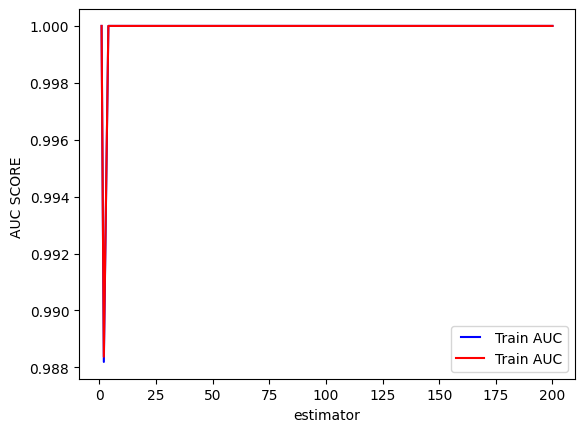

In [109]:
estimators = [1,2,4,8,16,32,64,100,200]
train_results = []
test_results = []

for estimator in estimators:
    rf = RandomForestClassifier(n_estimators=estimator,n_jobs=1)
    rf.fit(X_train,y_train)
    train_pred = rf.predict(X_train)
    false_rate, true_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_rate,true_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_rate, true_rate, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_rate,true_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(estimators,train_results,"b",label="Train AUC")
line2, = plt.plot(estimators,test_results,"r",label="Train AUC")
plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.xlabel("estimator")
plt.ylabel("AUC SCORE ")
plt.show()
